In [1]:
from IPython.display import Image
import numpy as np

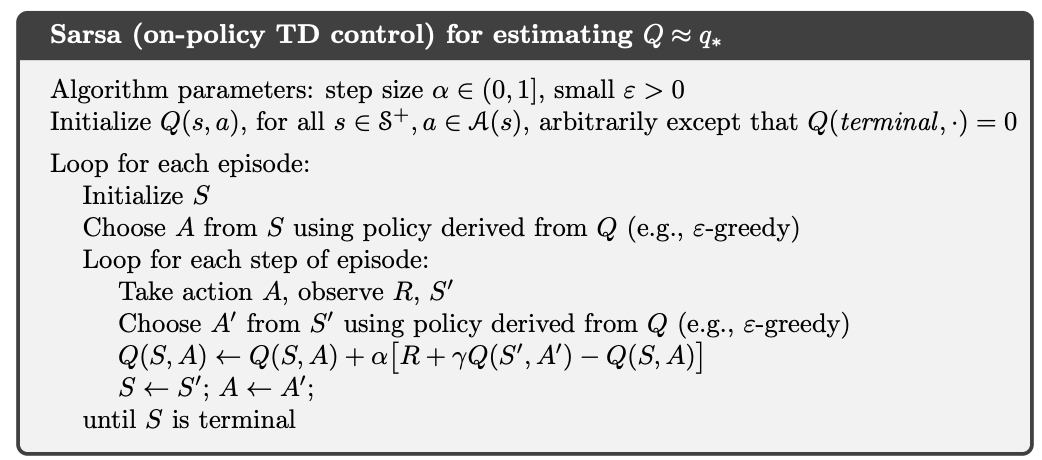

In [2]:
Image("../images/sarsa.png")

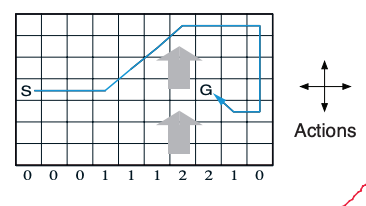

In [3]:
Image("../images/windy_gridworld.png")

In [140]:
np.random.choice(list(range(n_actions)))

2

In [131]:
t = 0
for i in range(10000):
    if np.random.uniform() < epsilon:
        t += 1
t

996

In [106]:
n_episodes = 100

alpha = 0.5
epsilon = 0.1
gamma = 1

1. initialise Q(s, a) for all s, Q(terminal, ) = 0

In [102]:
n_rows = 7
n_columns = 10
n_actions = 4
Q = np.zeros((n_actions, n_rows, n_columns))
# one array for each action
# define as up, down, left, right in that order

In [103]:
start_row = 3
start_col = 0
terminal_row = 3
terminal_col = 7

In [104]:
def move(a, r, c):
    if a == 0:
        return max(r - 1, 0), c
    elif a == 1:
        return min(r + 1, n_rows - 1), c
    elif a == 2:
        return r, max(c - 1, 0)
    elif a == 3:
        return r, min(c + 1, n_columns - 1)
    else:
        print("problem with the action")
        exit()

In [105]:
def is_terminal(r, c):
    if (r == terminal_row) & (c == terminal_col):
        return True
    else:
        return False

In [109]:
def add_wind(c, r):
    if c in [3, 4, 5, 8]:
        return max(r - 1, 0)
    elif c in [6, 7]:
        return max(r - 2, 0)
    else:
        return r

In [111]:
add_wind(1, 3)

3

In [107]:
# Loop for each episode
for n in range(n_episodes):
    # initialise S
    row = start_row
    col = start_col
    
    # Choose A from S (e-greedy)
    # np.argmax chooses first action (here it is up) and this would result in us never reaching the goal
    # this instead picks randomly between all possible actions of the same value
    # might want to also look at using np.isclose(b, b.max()) instead of b == b.max()
    action = np.random.choice(np.flatnonzero(Q[:, start_row, start_col] == Q[:, start_row, start_col].max()))
    
    # Loop for each step of the episode
    terminal = False
    while not terminal:
        
        old_action = action
        old_row = row
        old_col = col
        # Take action A, observe S`
        row, col = move(action, row, col)
        
        # Observe R
        if is_terminal(row, col):
            R = 0
        else:
            R = -1
        
        # Choose A` from S`
        action = np.random.choice(np.flatnonzero(Q[:, start_row, start_col] == Q[:, start_row, start_col].max()))
        
        Q[action, row, col] = Q[old_action, old_row, old_col] + \
        (alpha * (R + (gamma * Q[action, row, col]) - Q[old_action, old_row, old_col]))
        
        terminal = is_terminal(row, col)

KeyboardInterrupt: 

In [145]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probability for exploration
EPSILON = 0.1

# Sarsa step size
ALPHA = 0.5

# reward for each step
REWARD = -1.0

START = [3, 0]
GOAL = [3, 7]
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

def step(state, action):
    i, j = state
    if action == ACTION_UP:
        return [max(i - 1 - WIND[j], 0), j]
    elif action == ACTION_DOWN:
        return [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
    elif action == ACTION_LEFT:
        return [max(i - WIND[j], 0), max(j - 1, 0)]
    elif action == ACTION_RIGHT:
        return [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
    else:
        assert False

# play for an episode
def episode(q_value):
    # track the total time steps in this episode
    time = 0

    # initialize state
    state = START

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        action = np.random.choice(ACTIONS)
    else:
        values_ = q_value[state[0], state[1], :]
        action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

    # keep going until get to the goal state
    while state != GOAL:
        next_state = step(state, action)
        if np.random.binomial(1, EPSILON) == 1:
            next_action = np.random.choice(ACTIONS)
        else:
            values_ = q_value[next_state[0], next_state[1], :]
            next_action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

        # Sarsa update
        q_value[state[0], state[1], action] += \
            ALPHA * (REWARD + q_value[next_state[0], next_state[1], next_action] -
                     q_value[state[0], state[1], action])
        state = next_state
        action = next_action
        time += 1
    return time

def figure_6_3():
    q_value = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    episode_limit = 500

    steps = []
    ep = 0
    while ep < episode_limit:
        steps.append(episode(q_value))
        # time = episode(q_value)
        # episodes.extend([ep] * time)
        ep += 1
    print(f"average steeps {np.mean(steps[-200:])}")
    steps = np.add.accumulate(steps)

    plt.plot(steps, np.arange(1, len(steps) + 1))
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')

    plt.savefig('../images/figure_6_3.png')
    plt.close()

    # display the optimal policy
    optimal_policy = []
    for i in range(0, WORLD_HEIGHT):
        optimal_policy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == GOAL:
                optimal_policy[-1].append('G')
                continue
            bestAction = np.argmax(q_value[i, j, :])
            if bestAction == ACTION_UP:
                optimal_policy[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimal_policy[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimal_policy[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimal_policy[-1].append('R')
    print('Optimal policy is:')
    for row in optimal_policy:
        print(row)
    print('Wind strength for each column:\n{}'.format([str(w) for w in WIND]))

if __name__ == '__main__':
    figure_6_3()

average steeps 21.52
Optimal policy is:
['L', 'U', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'L', 'R', 'R', 'L', 'U', 'R', 'R', 'R', 'D']
['U', 'U', 'R', 'R', 'R', 'D', 'R', 'U', 'U', 'D']
['R', 'D', 'D', 'R', 'R', 'L', 'D', 'G', 'R', 'D']
['R', 'D', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'D']
['D', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'D']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
Wind strength for each column:
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
